In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import sklearn
from sklearn.decomposition import PCA

In [2]:
data_path = './data/img_align_celeba'
img_paths = [os.path.join(data_path, p) for p in os.listdir(data_path)]
#img_paths = np.array(img_paths)
print(len(img_paths))

202599


(218, 178, 3)


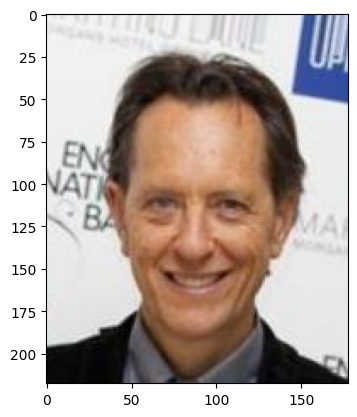

In [3]:
test_path = img_paths[0]
test_img = cv2.imread(test_path)
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
#print(test_img)
print(test_img.shape)
plt.imshow(test_img)

In [4]:
numImgs = 10000
numComps = 10
imgs = [cv2.imread(path) for path in img_paths[:numImgs]]
imgs = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in imgs]
imgs = np.array(imgs)
print(imgs.shape)
h = imgs.shape[1]
w = imgs.shape[2]
d = imgs.shape[3]
dims = (h,w,d)

(10000, 218, 178, 3)


In [5]:
#center image about 0
class ImgProcessor:

    def __init__(self):
        pass
        
    def preprocess(self,img):
        imgFloat = imgs.astype(np.float32)
        #min max normalization [-1,1]
        centered = (imgFloat/255)*2-1
        self.numImgs = img.shape[0]
        self.h = img.shape[1]
        self.w = img.shape[2]
        self.d = img.shape[3]
        self.dims=(h, w, d)
        X = np.reshape(centered, (numImgs, h*w*d))
        return X

    def _postprocess(self, img):
        print("post process")
        img = np.reshape(img, self.dims)
        print(self.dims)
        print("shape:", img.shape)
        img = (img+1)*255/2
        img = np.clip(img, 0, 255).astype(np.uint8)
        return img

    def _postprocess_multiple(self, imgs):
        print("post process multi")
        imgs = np.reshape(imgs, (imgs.shape[0],)+self.dims)
        print(self.dims)
        print("shape:", imgs.shape)
        imgs = (imgs+1)*255/2
        imgs = np.clip(imgs, 0, 255).astype(np.uint8)
        return imgs

    def postprocess(self, imgs):
        if len(imgs.shape) == 1:
            return self._postprocess(imgs)
        else:
            print("multiple")
            return(self._postprocess_multiple(imgs))
    

In [6]:
Proc = ImgProcessor()
X = Proc.preprocess(imgs)
print(X.shape)
print(np.mean(X))

(10000, 116412)
-0.123193264


In [7]:
pca = PCA(n_components=numComps, random_state=0)
pca.fit(X)

PCA(n_components=10, random_state=0)

0
(116412,)
[0.00458644 0.00476649 0.00477979 ... 0.00161902 0.00163374 0.00158042]
post?
post process
(218, 178, 3)
shape: (218, 178, 3)
(218, 178, 3)
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


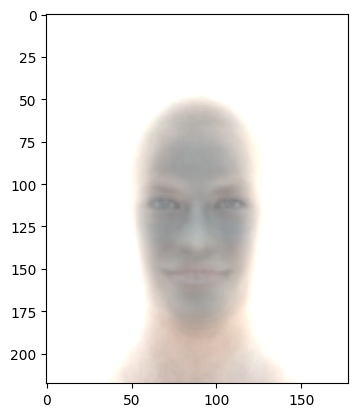

1
(116412,)
[-0.00330432 -0.00334683 -0.00332685 ...  0.00329421  0.00332467
  0.00327989]
post?
post process
(218, 178, 3)
shape: (218, 178, 3)
(218, 178, 3)
[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


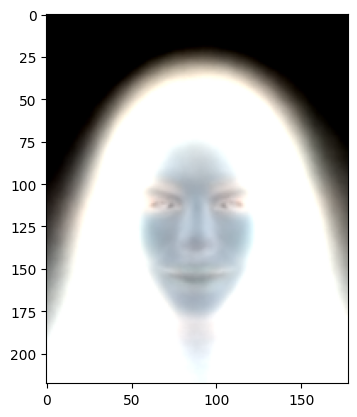

2
(116412,)
[-0.00122681 -0.00125089 -0.00120085 ...  0.00224239  0.00232899
  0.00233628]
post?
post process
(218, 178, 3)
shape: (218, 178, 3)
(218, 178, 3)
[[[ 51  50  53]
  [ 50  48  51]
  [ 48  47  50]
  ...
  [237 240 237]
  [237 240 237]
  [236 239 236]]

 [[ 51  49  52]
  [ 50  48  52]
  [ 49  47  51]
  ...
  [237 240 238]
  [237 240 237]
  [236 239 237]]

 [[ 49  48  51]
  [ 49  48  51]
  [ 48  47  51]
  ...
  [237 240 238]
  [237 240 237]
  [236 239 237]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


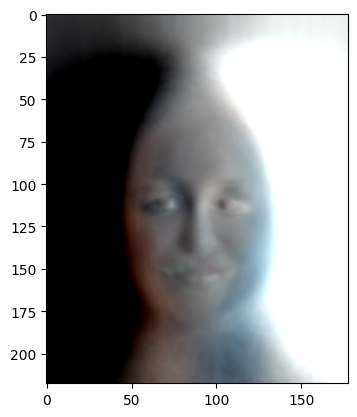

3
(116412,)
[-0.00058828 -0.00082039 -0.00109507 ... -0.00456589 -0.00458506
 -0.00446524]
post?
post process
(218, 178, 3)
shape: (218, 178, 3)
(218, 178, 3)
[[[ 98  87  73]
  [ 99  88  74]
  [100  88  75]
  ...
  [106  94  83]
  [104  93  82]
  [103  92  81]]

 [[ 99  88  74]
  [100  89  75]
  [100  89  75]
  ...
  [105  93  82]
  [104  93  82]
  [103  91  81]]

 [[ 99  88  74]
  [ 99  88  75]
  [100  89  75]
  ...
  [104  93  82]
  [104  92  82]
  [103  92  81]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]]


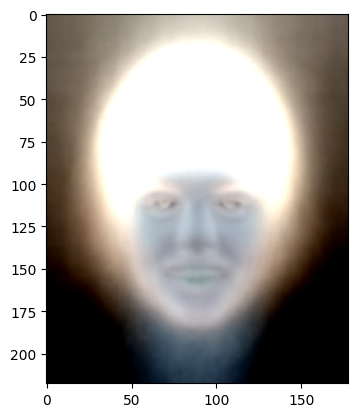

4
(116412,)
[-0.00258571 -0.00251699 -0.00250135 ... -0.00173012 -0.00142281
 -0.00115699]
post?
post process
(218, 178, 3)
shape: (218, 178, 3)
(218, 178, 3)
[[[  9  12  13]
  [ 10  13  13]
  [ 10  13  13]
  ...
  [  3   7   9]
  [  5   9  11]
  [  5   9  10]]

 [[ 10  13  13]
  [ 10  13  14]
  [ 10  13  13]
  ...
  [  3   8   9]
  [  5   9  10]
  [  5   9  10]]

 [[ 10  13  13]
  [ 11  14  14]
  [ 10  13  13]
  ...
  [  3   7   9]
  [  5   9  10]
  [  5   9  10]]

 ...

 [[ 78  90 102]
  [ 80  92 104]
  [ 80  92 103]
  ...
  [ 53  66  78]
  [ 53  66  78]
  [ 51  64  77]]

 [[ 77  89 101]
  [ 78  91 102]
  [ 78  91 102]
  ...
  [ 51  65  77]
  [ 51  65  77]
  [ 49  63  75]]

 [[ 74  87  98]
  [ 76  89 100]
  [ 76  89 100]
  ...
  [ 51  65  77]
  [ 50  64  76]
  [ 48  62  74]]]


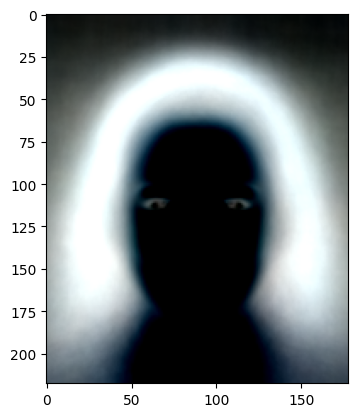

5
(116412,)
[-1.5968131e-04 -1.1284079e-04 -5.6402176e-05 ...  2.0156580e-03
  2.0043312e-03  1.9450040e-03]
post?
post process
(218, 178, 3)
shape: (218, 178, 3)
(218, 178, 3)
[[[121 122 125]
  [121 123 125]
  [120 122 124]
  ...
  [204 212 212]
  [202 210 211]
  [202 210 210]]

 [[120 122 124]
  [120 122 124]
  [120 122 124]
  ...
  [203 211 211]
  [202 210 211]
  [202 210 210]]

 [[119 121 123]
  [119 120 122]
  [119 121 123]
  ...
  [203 211 211]
  [201 210 210]
  [201 209 210]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [209 210 207]
  [210 210 208]
  [210 209 207]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [209 209 207]
  [210 210 207]
  [210 209 207]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [210 210 208]
  [208 208 206]
  [208 208 205]]]


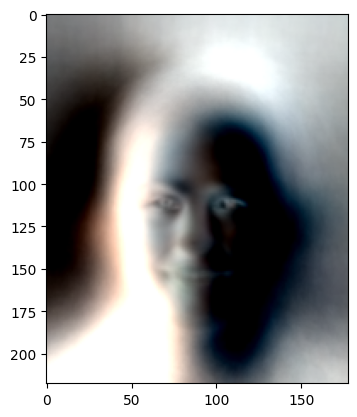

6
(116412,)
[-0.00180277 -0.00175154 -0.00153449 ... -0.00707745 -0.00639964
 -0.00565679]
post?
post process
(218, 178, 3)
shape: (218, 178, 3)
(218, 178, 3)
[[[ 55  57  66]
  [ 55  57  65]
  [ 54  56  64]
  ...
  [ 93  94 105]
  [ 94  95 105]
  [ 94  94 105]]

 [[ 55  57  66]
  [ 55  57  66]
  [ 55  57  65]
  ...
  [ 93  94 105]
  [ 93  94 105]
  [ 93  94 105]]

 [[ 55  57  66]
  [ 55  57  66]
  [ 55  57  66]
  ...
  [ 94  95 106]
  [ 94  95 106]
  [ 94  96 106]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]]


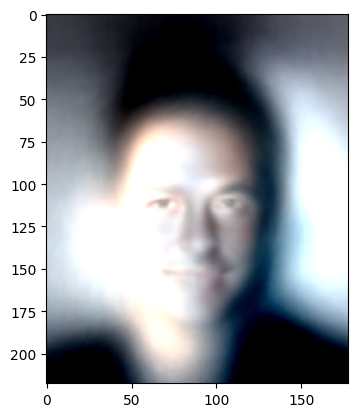

7
(116412,)
[-0.0039083   0.00066696  0.00425511 ... -0.00616319 -0.00292093
 -0.00037601]
post?
post process
(218, 178, 3)
shape: (218, 178, 3)
(218, 178, 3)
[[[  0 149 255]
  [  0 149 255]
  [  0 150 255]
  ...
  [ 17 163 255]
  [ 16 162 255]
  [ 16 162 255]]

 [[  0 149 255]
  [  0 149 255]
  [  0 150 255]
  ...
  [ 16 162 255]
  [ 16 162 255]
  [ 15 161 255]]

 [[  0 149 255]
  [  0 149 255]
  [  0 149 255]
  ...
  [ 15 161 255]
  [ 15 161 255]
  [ 15 161 255]]

 ...

 [[  0  18 102]
  [  0  16 101]
  [  0  17 101]
  ...
  [  0  30 113]
  [  0  30 114]
  [  0  30 114]]

 [[  0  17 101]
  [  0  16 101]
  [  0  16 100]
  ...
  [  0  31 115]
  [  0  30 114]
  [  0  30 114]]

 [[  0  19 103]
  [  0  17 101]
  [  0  17 101]
  ...
  [  0  30 114]
  [  0  31 115]
  [  0  30 115]]]


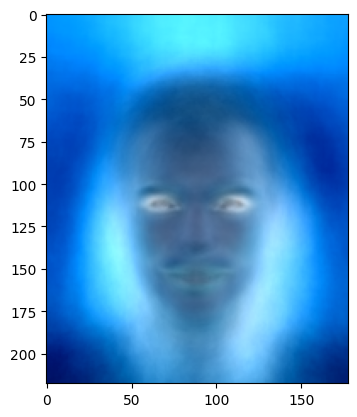

8
(116412,)
[-0.00572512 -0.00302983 -0.00071395 ...  0.00221008  0.00331872
  0.00410331]
post?
post process
(218, 178, 3)
shape: (218, 178, 3)
(218, 178, 3)
[[[  0  30 104]
  [  0  30 104]
  [  0  30 104]
  ...
  [  0   9  82]
  [  0  10  83]
  [  0  10  83]]

 [[  0  32 106]
  [  0  31 105]
  [  0  30 104]
  ...
  [  0  10  83]
  [  0  11  83]
  [  0  10  83]]

 [[  0  34 108]
  [  0  33 107]
  [  0  32 106]
  ...
  [  0  11  84]
  [  0  12  85]
  [  0  11  84]]

 ...

 [[236 255 255]
  [236 255 255]
  [236 255 255]
  ...
  [196 231 255]
  [197 233 255]
  [197 233 255]]

 [[235 255 255]
  [235 255 255]
  [234 255 255]
  ...
  [197 231 255]
  [198 233 255]
  [198 233 255]]

 [[235 255 255]
  [235 255 255]
  [234 255 255]
  ...
  [197 231 255]
  [198 233 255]
  [198 233 255]]]


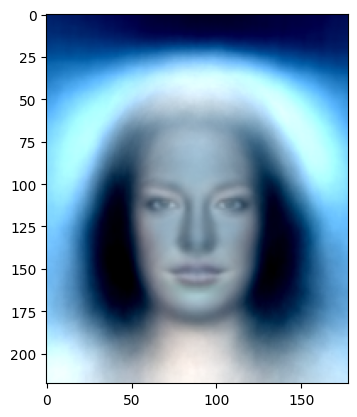

9
(116412,)
[-0.00408629 -0.00419978 -0.00426057 ... -0.00490189 -0.00505163
 -0.00485068]
post?
post process
(218, 178, 3)
shape: (218, 178, 3)
(218, 178, 3)
[[[  2   0   0]
  [  2   0   0]
  [  1   0   0]
  ...
  [251 248 241]
  [250 247 240]
  [249 247 240]]

 [[  1   0   0]
  [  1   0   0]
  [  0   0   0]
  ...
  [251 248 242]
  [251 248 241]
  [250 247 240]]

 [[  1   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [253 250 244]
  [251 249 242]
  [250 248 241]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]]


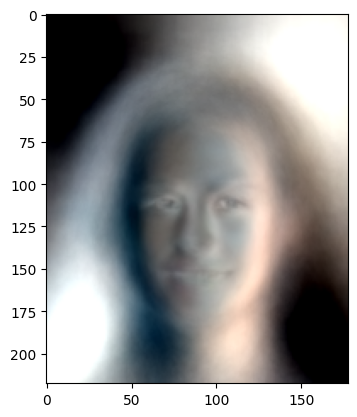

In [10]:
for c in range(numComps):
    print(c)
    component = pca.components_[c]
    value = pca.singular_values_[c]
    print(component.shape)
    print(component)
    print("post?")
    compProcessed = Proc.postprocess(component*value/10)
    print(compProcessed.shape)
    print(compProcessed)
    plt.imshow(compProcessed)
    plt.show()



[[ 52.61242     54.677788    54.830345   ...  18.572275    18.741055
   18.129515  ]
 [-17.36157    -17.584967   -17.479956   ...  17.30847     17.468513
   17.233253  ]
 [ -5.9568563   -6.073754    -5.8308125  ...  10.888051    11.308561
   11.34397   ]
 ...
 [-10.142662     1.7308588   11.042682   ... -15.994469    -7.580274
   -0.97581106]
 [-14.365106    -7.602255    -1.7913992  ...   5.5453925    8.327122
   10.295772  ]
 [ -9.834305   -10.107446   -10.253744   ... -11.797172   -12.157554
  -11.673931  ]]
post process
(218, 178, 3)
shape: (218, 178, 3)


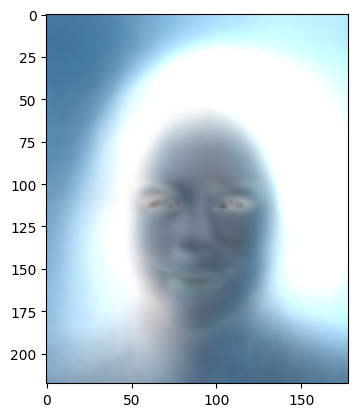

In [13]:
scaled_components = pca.components_*pca.singular_values_[:, np.newaxis]
print(scaled_components)
golden = np.sum(scaled_components, axis=0)
golden = Proc.postprocess(golden/50)
golden = np.reshape(golden, Proc.dims).astype(np.uint8)
plt.imshow(golden)